In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump, load


In [2]:
ad_data = pd.read_csv('Advertising.csv', index_col=0)
ad_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
inputs = ad_data[['TV', 'Radio', 'Newspaper']]
output = ad_data['Sales']

In [6]:
# split the data as training data and testing data . I use 20% of the data for testing
inputs_train, inputs_test, output_train, output_test = train_test_split(inputs, 
                                                                        output, test_size=0.2, random_state=42)

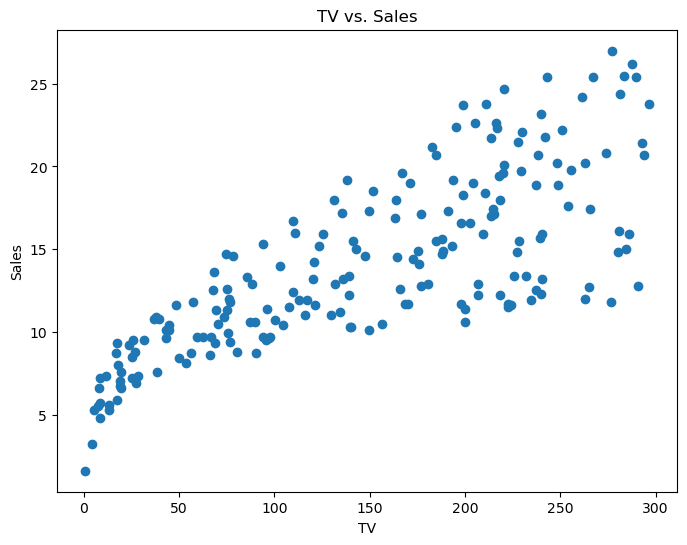

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(ad_data['TV'], ad_data['Sales'])
plt.xlabel('TV')  
plt.ylabel('Sales')
plt.title('TV vs. Sales')
plt.show()

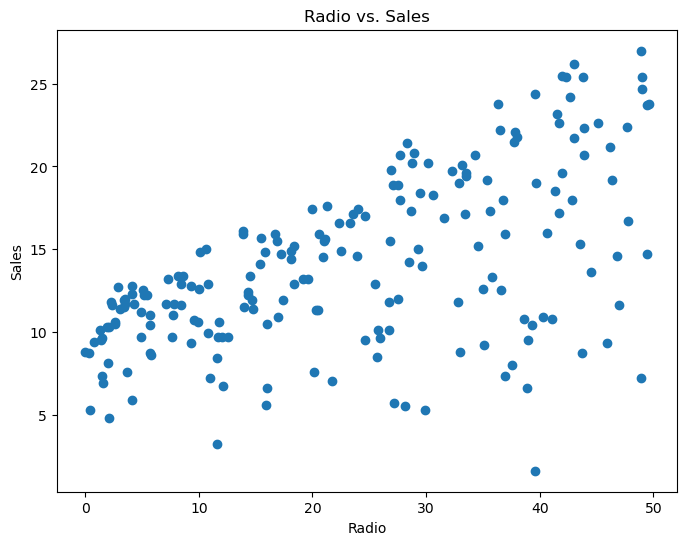

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(ad_data['Radio'], ad_data['Sales'])
plt.xlabel('Radio')  
plt.ylabel('Sales')
plt.title('Radio vs. Sales')
plt.show()

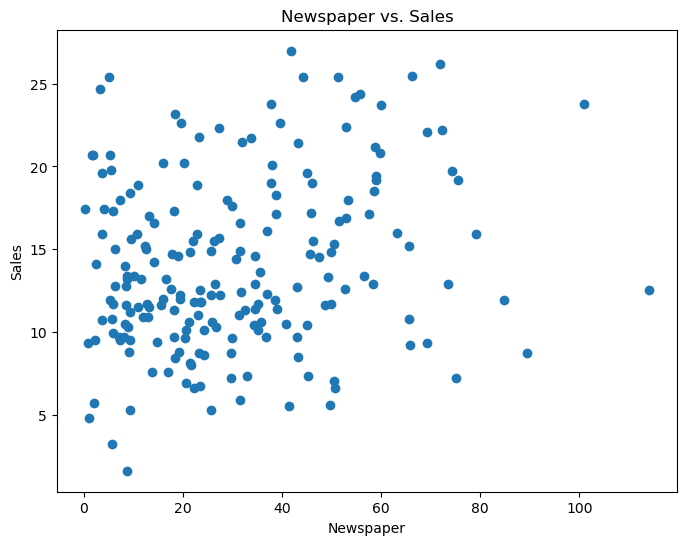

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(ad_data['Newspaper'], ad_data['Sales'])
plt.xlabel('Newspaper')  
plt.ylabel('Sales')
plt.title('Newspaper vs. Sales')
plt.show()

/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


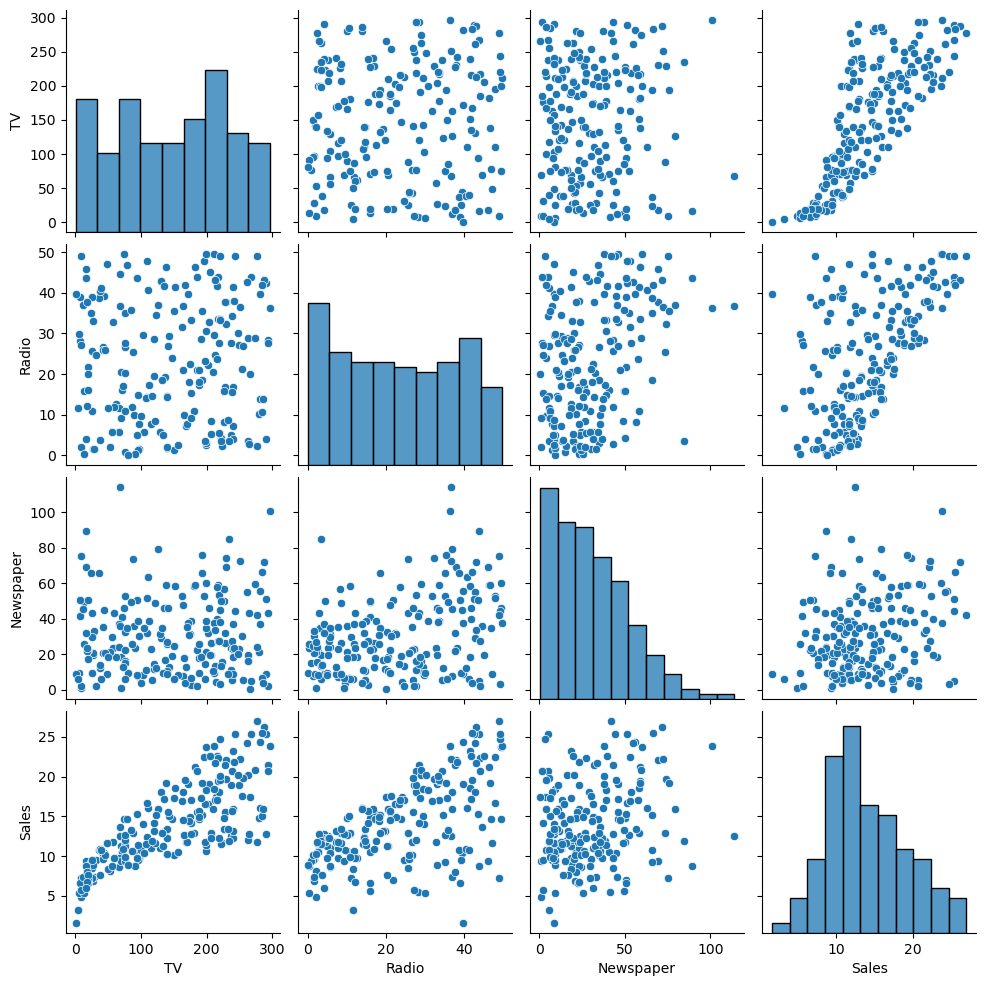

In [10]:
sns.pairplot(ad_data)

In [11]:
ad_model = LinearRegression()

In [12]:
ad_model.fit(inputs_train, output_train)

LinearRegression()

In [13]:
test_prediction= ad_model.predict(inputs_test)
print(test_prediction)

[16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]


In [14]:
output_mean = ad_data['Sales'].mean()
print(output_mean)


14.0225


In [15]:
MAE = mean_absolute_error(output_test, test_prediction)
print(MAE)

1.4607567168117606


In [16]:
RMSE = np.sqrt(mean_squared_error(output_test,test_prediction))
print(RMSE)

1.7815996615334506


In [17]:
resdual = output_test -test_prediction


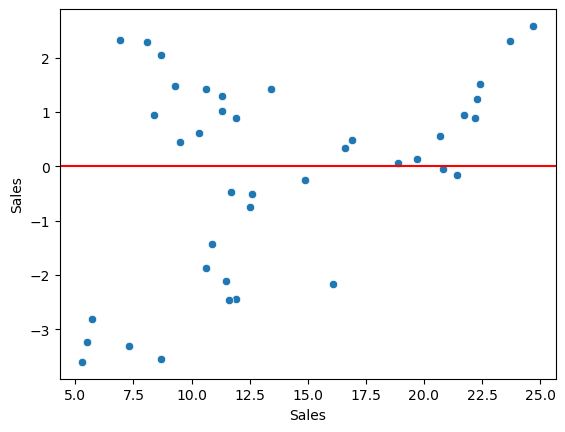

In [18]:
sns.scatterplot(x=output_test,y=resdual)
plt.axhline(y=0,color ='r')

/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


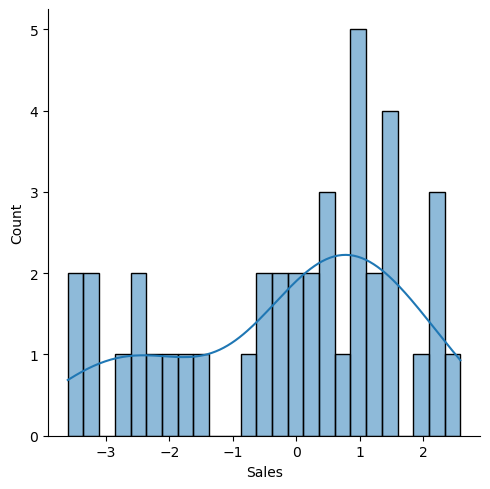

In [19]:
sns.displot(resdual, bins = 25, kde = True)

In [20]:
my_model = LinearRegression()

In [21]:
my_model.fit(inputs,output)

LinearRegression()

In [22]:
my_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [23]:
output_prediction = my_model.predict(inputs)


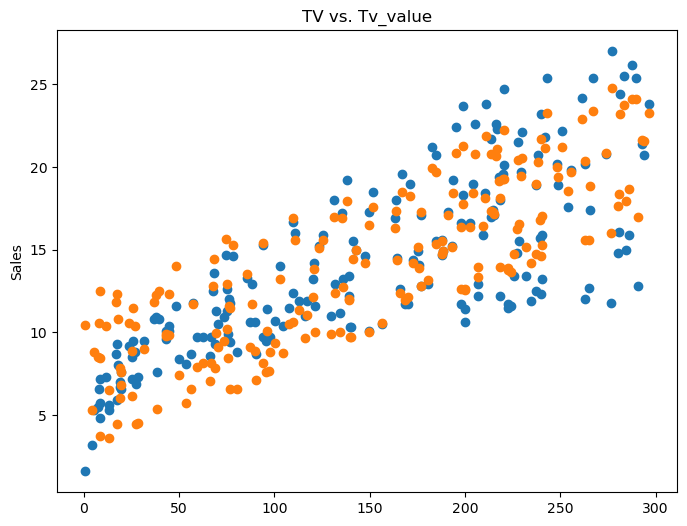

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(ad_data['TV'], ad_data['Sales'])
plt.scatter(ad_data['TV'], output_prediction)  
plt.ylabel('Sales')
plt.title('TV vs. Tv_value')
plt.show()

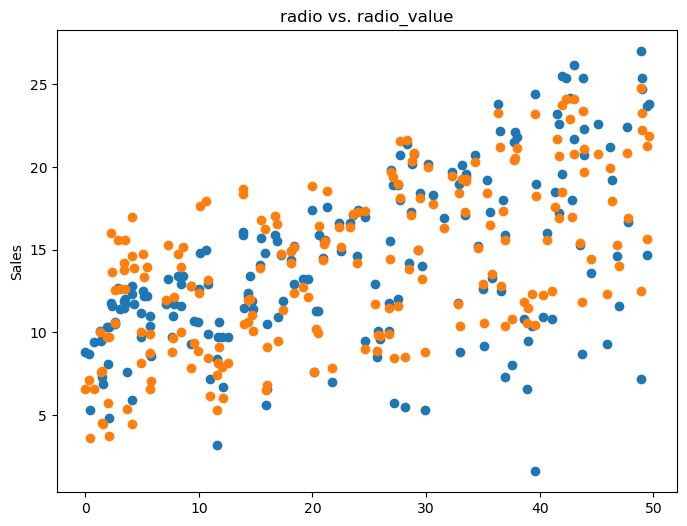

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(ad_data['Radio'], ad_data['Sales'])
plt.scatter(ad_data['Radio'], output_prediction)  
plt.ylabel('Sales')
plt.title('radio vs. radio_value')
plt.show()

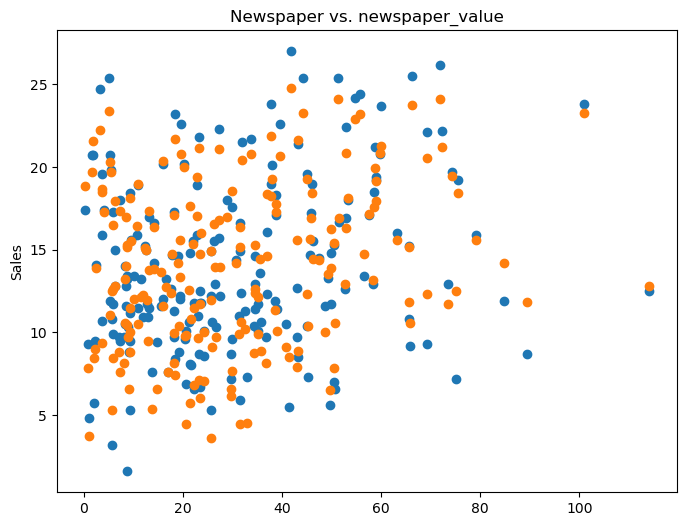

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(ad_data['Newspaper'], ad_data['Sales'])
plt.scatter(ad_data['Newspaper'], output_prediction)  
plt.ylabel('Sales')
plt.title('Newspaper vs. newspaper_value')
plt.show()

In [27]:
dump(my_model,'final_model.joblib')

['final_model.joblib']

In [28]:
loaded_model = load('final_model.joblib')

In [29]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [30]:
inputs.shape

(200, 3)

In [34]:
make_prediction_input = input("Enter the values for make_prediction (separated by commas): ")

Enter the values for make_prediction (separated by commas): 149,22,12


In [35]:
make_prediction = [[int(value) for value in make_prediction_input.split(',')]]
print("make_prediction values:", make_prediction)

make_prediction values: [[149, 22, 12]]


In [36]:
predicted_value = loaded_model.predict(make_prediction)
print('Predicted value is:', predicted_value)

Predicted value is: [13.893032]


/Users/bitaniyanassir/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
